Exercice 1.1

entre 0 et 5s

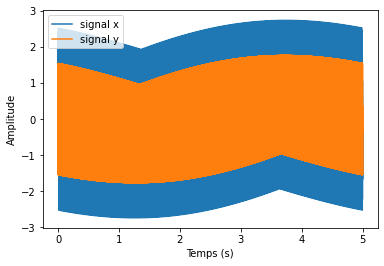

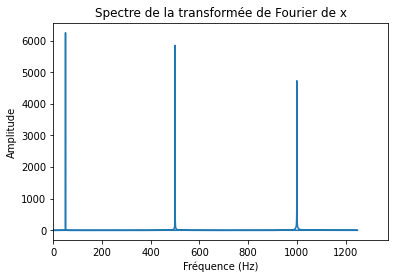

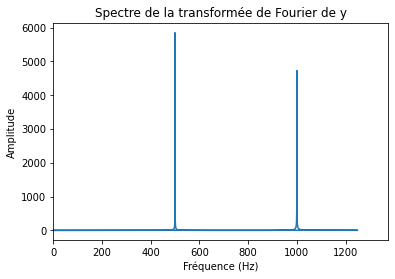

In [43]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 5, 12500)
f1 = 1000
f2 = 500
f3 = 50
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)
y = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

plt.plot(t, x, label='signal x')
plt.plot(t, y, label='signal y')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

X = np.fft.fft(x)
Y = np.fft.fft(y)
freq = np.fft.fftfreq(len(X), t[1] - t[0])

plt.figure()
plt.title('Spectre de la transformée de Fourier de x')
plt.plot(freq, np.abs(X), label='Fourier x')
plt.xlim(0)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.show()

plt.figure()
plt.title('Spectre de la transformée de Fourier de y')
plt.plot(freq, np.abs(Y), label='Fourier y')
plt.xlim(0)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.show()

Exercice 1.2
a)

|H(f)|

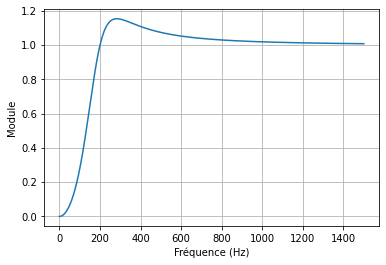

In [41]:
K = 1
fc = 200

f = np.linspace(0, 1500, 10000)
H = (K * np.power(1j*f/fc,2))/(1 + 1j*f/fc + np.power(1j*f/fc,2))

plt.plot(f, abs(H))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Module')
plt.grid()
plt.show()

Exercice 1.2
b)

20log(|H(f)|) pour différentes fc

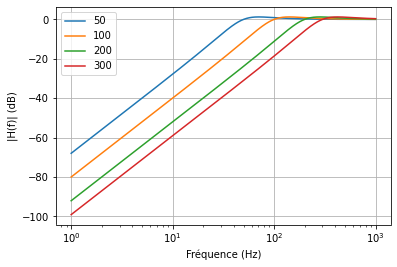

In [40]:
K = 1
fc = 50
fc2 = 100
fc3 = 200
fc4 = 300

f = np.logspace(0, 3, 1000)

H = (K * np.power(1j*f/fc,2))/(1 + 1j*f/fc + np.power(1j*f/fc,2))
H2 = (K * np.power(1j*f/fc2,2))/(1 + 1j*f/fc2 + np.power(1j*f/fc2,2))
H3 = (K * np.power(1j*f/fc3,2))/(1 + 1j*f/fc3 + np.power(1j*f/fc3,2))
H4 = (K * np.power(1j*f/fc4,2))/(1 + 1j*f/fc4 + np.power(1j*f/fc4,2))

plt.semilogx(f, 20*np.log10(abs(H) + 1e-10), label='50')
plt.semilogx(f, 20*np.log10(abs(H2) + 1e-10), label='100')
plt.semilogx(f, 20*np.log10(abs(H3) + 1e-10), label='200')
plt.semilogx(f, 20*np.log10(abs(H4) + 1e-10), label='300')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('|H(f)| (dB)')
plt.grid()
plt.legend()
plt.show()

Exercice 1.2
c) et e) partie 1

spectre du signal de sortie y(t) après application de différents filtre passe haut de différentes fc

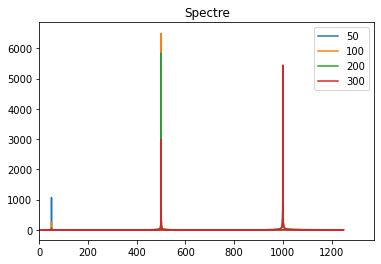

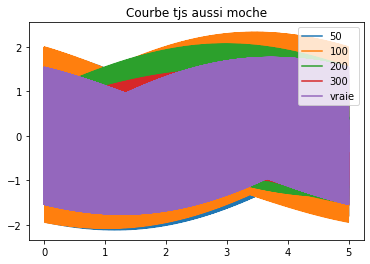

In [39]:
f1 = 1000
f2 = 500
f3 = 50
t = np.linspace(0, 5, 12500)

x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)
y = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

# TF
X = np.fft.fft(x)
freq = np.fft.fftfreq(len(X), t[1] - t[0])

K = 1
fc = 50
fc2 = 100
fc3 = 200
fc4 = 300

f = np.linspace(0, 1000, 12500)

H = (K * np.power(1j*f/fc,2))/(1 + 1j*f/fc + np.power(1j*f/fc,2))
H2 = (K * np.power(1j*f/fc2,2))/(1 + 1j*f/fc2 + np.power(1j*f/fc2,2))
H3 = (K * np.power(1j*f/fc3,2))/(1 + 1j*f/fc3 + np.power(1j*f/fc3,2))
H4 = (K * np.power(1j*f/fc4,2))/(1 + 1j*f/fc4 + np.power(1j*f/fc4,2))

X_filtre1 = X * H
X_filtre2 = X * H2
X_filtre3 = X * H3
X_filtre4 = X * H4

plt.title('Spectre')
plt.plot(freq, np.abs(X_filtre1), label='50')
plt.plot(freq, np.abs(X_filtre2), label='100')
plt.plot(freq, np.abs(X_filtre3), label='200')
plt.plot(freq, np.abs(X_filtre4), label='300')
plt.xlim(0)
plt.legend()
plt.show()

x_filtre1 = np.fft.ifft(X_filtre1)
x_filtre2 = np.fft.ifft(X_filtre2)
x_filtre3 = np.fft.ifft(X_filtre3)
x_filtre4 = np.fft.ifft(X_filtre4)

plt.title('Courbe tjs aussi moche')
plt.plot(t, np.real(x_filtre1), label='50')
plt.plot(t, np.real(x_filtre2), label='100')
plt.plot(t, np.real(x_filtre3), label='200')
plt.plot(t, np.real(x_filtre4), label='300')
plt.plot(t, y, label='vraie')
plt.legend()
plt.show()

e) partie 2

norme de y - y_tilde : 0.4801867159398734 Tend vers zero donc bonne approximation


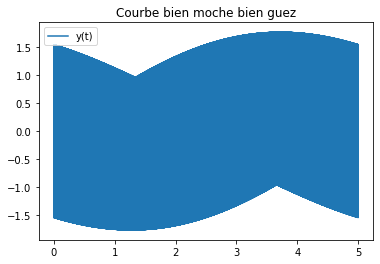

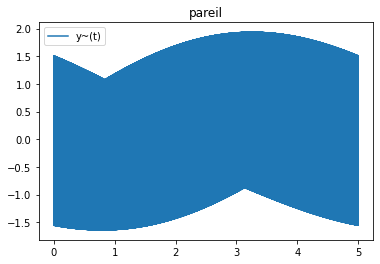

In [38]:
K = 1
f1 = 1000
f2 = 500
fc = 150
t = np.linspace(0, 5, 12500)

y = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

Hf1 = (K * np.power(1j*f1/fc,2))/(1 + 1j*f1/fc + np.power(1j*f1/fc,2))
Hf1_neg = (K * np.power(-1j*f1/fc,2))/(1 - 1j*f1/fc + np.power(-1j*f1/fc,2))
Hf2 = (K * np.power(1j*f2/fc,2))/(1 + 1j*f2/fc + np.power(1j*f2/fc,2))
Hf2_neg = (K * np.power(-1j*f2/fc,2))/(1 - 1j*f2/fc + np.power(-1j*f2/fc,2))

y_tilde = 1/2j*(Hf1*np.exp(2j*np.pi*f1*t) - Hf1_neg*np.exp(-2j*np.pi*f1*t) + Hf2*np.exp(2j*np.pi*f2*t) - Hf2_neg*np.exp(-2j*np.pi*f2*t))

z=y-y_tilde

norme_inf = np.linalg.norm(z, np.inf)
print("norme de y - y_tilde : " + str(norme_inf) + " Tend vers zero donc bonne approximation")

plt.subplots(1,1)
plt.title("Courbe bien moche bien guez")
plt.plot(t, y, label='y(t)')
plt.legend()
plt.subplots(1,1)
plt.title("pareil")
plt.plot(t, np.real(y_tilde), label='y~(t)')
plt.legend()
plt.show()

Entre 0 et 0.01s pour mieux voir

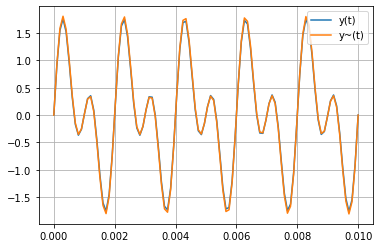

In [37]:
K = 1
f1 = 1000
f2 = 500
fc = 150
t=np.linspace(0, 0.01, 100)

y = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

Hf1 = np.abs((K * np.power(1j*f1/fc,2))/(1 + 1j*f1/fc + np.power(1j*f1/fc,2)))
Hf1_neg = np.abs((K * np.power(-1j*f1/fc,2))/(1 - 1j*f1/fc + np.power(-1j*f1/fc,2)))
Hf2 = np.abs((K * np.power(1j*f2/fc,2))/(1 + 1j*f2/fc + np.power(1j*f2/fc,2)))
Hf2_neg = np.abs((K * np.power(-1j*f2/fc,2))/(1 - 1j*f2/fc + np.power(-1j*f2/fc,2)))

y_tilde = 1/2j*(Hf1*np.exp(2j*np.pi*f1*t) - Hf1_neg*np.exp(-2j*np.pi*f1*t) + Hf2*np.exp(2j*np.pi*f2*t) - Hf2_neg*np.exp(-2j*np.pi*f2*t))

plt.plot(t, y, label='y(t)')
plt.plot(t, np.real(y_tilde), label='y~(t)')
plt.legend()
plt.grid()
plt.show()

Exercice 2.1

Soit la relation à vérifier :

$$h(n) = [-2(\frac{-1}{3})^n + 3(\frac{-1}{2})^n]\: u[n]$$

Avec u[n] l'échelon numérique représenté par la suite :
$$
n \mapsto u[n] = \left\{
\begin{array}{ll}
    1 \text{ si } n \geq 0 \\
    0 \text{ sinon}
\end{array} 
\right.
$$

On se place donc dans le cas de $n \geq 0$ dans la suite de la démonstration. On utilise l'expression de la réponse impulsionnelle

$$
\left\{
\begin{array}{ll}
    (1) \Leftrightarrow h(n)+\frac{5}{6}h(n-1)+\frac{1}{6}h(n-2)=0 \\
    h(0)=1 \text{ et } h(1)=-\frac{5}{6}
\end{array} 
\right.
$$

h(n) vérifie-t-il la relation suivante : 


$$\forall n \geq 0 : h(n) = -2(\frac{-1}{3})^n + 3(\frac{-1}{2})^n$$

Pour cela, on substitue la valeur de h dans l'équation (1) :

$\quad (1) \Leftrightarrow -2(-\frac{1}{3})^n + 3(-\frac{1}{2})^n + \frac{5}{6}[-2(-\frac{1}{3})^{n-1} + 3(-\frac{1}{2})^{n-1}] + \frac{1}{6}[-2(-\frac{1}{3})^{n-2} + 3(-\frac{1}{2})^{n-2}]$

$\quad (1) \Leftrightarrow -2\frac{1}{9}(-\frac{1}{3})^{n-2} + 3\frac{1}{4}(-\frac{1}{2})^{n-2} + \frac{5}{6}[\frac{2}{3}(-\frac{1}{3})^{n-2} - \frac{3}{2}(-\frac{1}{2})^{n-2}] + \frac{1}{6}[-2(-\frac{1}{3})^{n-2} + 3(-\frac{1}{2})^{n-2}]$

$\quad (1) \Leftrightarrow (-\frac{1}{3})^{n-2}[\frac{-2}{9} + \frac{10}{18} - \frac{2}{6}] + (-\frac{1}{2})^{n-2}[\frac{3}{4} - \frac{15}{12} + \frac{3}{6}] = 0+ 0 = 0$

On a bien $h(n) + \frac{5}{6} h(n-1) + \frac{1}{6} h(n-2) = 0$ avec $h(n)=-\frac{1}{3})^n + 3(-\frac{1}{2})^n$

$$\boxed{\text{Ainsi, }\forall n \geq 2 : h(n)=(\frac{-1}{3})^n + 3(\frac{-1}{2})^n}$$

Avec en initialisation de la récurrence : 

$\quad$ Pour n = 0 : $h(0) = -2(-\frac{1}{3})^0 + 3(-\frac{1}{2})^0 = -2 + 3 = 1$

$\quad$ Pour n = 1 : $h(1) = -2(-\frac{1}{3})^1 + 3(-\frac{1}{2})^1 = \frac{2}{3} - \frac{3}{2} = -\frac{5}{6}$

La relation est vérifiée à partir de n=1 car :

$$h(0)\: u[0] = h(0) = 1 \neq 0$$

$$h(1)\: u[1] + \frac{5}{6}h(0)\: u[0] = -\frac{5}{6} + \frac{5}{6} = 0$$

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


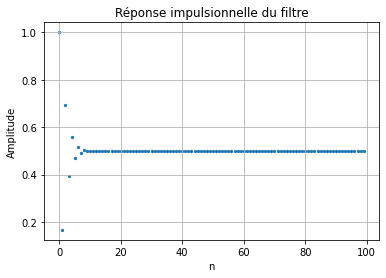

In [35]:
from scipy.signal import lfilter

def h(n):
    return -2 * (-1/3)**n + 3 * (-1/2)**n

N = 100
u = np.zeros(N)
u[0:] = 1
print(u)

h_n = h(np.arange(N))
y = lfilter(h_n, 1, u)

plt.scatter(np.arange(N), y, s=5)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Réponse impulsionnelle du filtre')
plt.grid(True)
plt.show()

Exercice 2.2 

1)

On utilise la relation de récurrence de h : 
$$
\left\{
\begin{array}{ll}
    h(n)+\frac{5}{6}h(n-1)+\frac{1}{6}h(n-2)=0 \\
    h(0)=1 \text{ et } h(1)=-\frac{5}{6}
\end{array} 
\right.
$$

$\qquad z^2+\frac{5}{6}z+\frac{1}{6}=0$

$\qquad \Delta = (\frac{5}{6})^2-\frac{4}{6} = \frac{1}{36}\qquad$
Ce qui nous donne :
$
\qquad
\left\{
\begin{array}{ll}
    z_1 = \frac{\frac{-5}{6} + \frac{1}{6}}{2} = \frac{-1}{3} \\
    z_2 = \frac{\frac{-5}{6} - \frac{1}{6}}{2} = \frac{-1}{2}
\end{array} 
\right.
$

Donc $h(z)= a \cdot z_1^n + b \cdot z_2^n$

$
\quad
\left\{
\begin{array}{ll}
    h(0) = a+b=1 \\
    h(1)= a\cdot\frac{-1}{3}+b\cdot\frac{-1}{2} = \frac{-5}{6}
\end{array} 
\right.
$
$\Leftrightarrow$
$
\left\{
\begin{array}{ll}
    a=1-b \\
    (1-b)\cdot\frac{-1}{3} + b\cdot\frac{-1}{2} = \frac{-1}{3} + \frac{-b}{6} = \frac{-5}{6} \Leftrightarrow b = 3
\end{array} 
\right.
$

$$
\text{Donc : }
\left\{
\begin{array}{ll}
    a = 1 - 3 = -2 \\
    b = 3
\end{array} 
\right.
$$

On obtient donc la relation :

$$\forall n \geq 0 : h(n) = -2\cdot(-\frac{1}{3})^n + 3\cdot(-\frac{1}{2})^n$$

On retrouve donc le résultat de la question 1) de l'étude temporelle :

$$\boxed{\forall n \in \mathbb{N} : h(n) = [-2\cdot(-\frac{1}{3})^n + 3\cdot(-\frac{1}{2})^n]\: u[n]}$$

2)

Expression de $H_f(\lambda)$ :

$H_f(\lambda) = H(e^{2j\pi\frac{\lambda}{Fe}})$

Avec $H(f) = K\frac{(j\frac{f}{f_c})^2}{1+j\frac{f}{f_c}+(j\frac{f}{f_c})^2}$

D'où :
$
H_f(\lambda) = K\frac{(j\frac{e^{2j\pi\frac{\lambda}{Fe}}}{f_c})^2}{1+j\frac{e^{2j\pi\frac{\lambda}{Fe}}}{f_c}+(j\frac{e^{2j\pi\frac{\lambda}{Fe}}}{f_c})^2}
$

Calculons $\mid H_f(\lambda)\mid$

$\mid H_f(\lambda)\mid\:$
$
\Rightarrow
\left\{
\begin{array}{ll}
    \mid -\frac{e^{4j\pi\frac{\lambda}{Fe}}}{f_c^2}\mid = \frac{1}{f_c^2} \\
    \mid 1 + j\frac{e^{2j\pi\frac{\lambda}{Fe}}}{f_c} - \frac{e^{4j\pi\frac{\lambda}{Fe}}}{f_c^2}\mid = \sqrt{Re^2 + Im^2}
\end{array} 
\right.
$

$
\mid 1 + j\frac{e^{2j\pi\frac{\lambda}{Fe}}}{f_c} - \frac{e^{4j\pi\frac{\lambda}{Fe}}}{f_c^2}\mid = 
\sqrt{(1-\frac{\sin(2\pi\frac{\lambda}{Fe})}{f_c}+\frac{\cos(4\pi\frac{\lambda}{Fe})}{f_c^2})^2+(\frac{\cos(2\pi\frac{\lambda}{Fe})}{f_c}+\frac{\sin(4\pi\frac{\lambda}{Fe})}{f_c^2})^2}
$

$
\mid 1 + j\frac{e^{2j\pi\frac{\lambda}{Fe}}}{f_c} - \frac{e^{4j\pi\frac{\lambda}{Fe}}}{f_c^2}\mid =
\sqrt{1+\frac{1}{f_c^2}+\frac{1}{f_c^4}-\frac{2\sin(2\pi\frac{\lambda}{Fe})}{f_c}+\frac{2\cos(4\pi\frac{\lambda}{Fe})}{f_c^2}}
$

Ainsi$$\boxed{\mid H_f(\lambda)\mid = \frac{1}{\sqrt{f_c^4+f_c^2+1-2f_c^3\sin(2\pi\frac{\lambda}{Fe})+2f_c^2\cos(4\pi\frac{\lambda}{Fe})}}} $$

3) et 4)

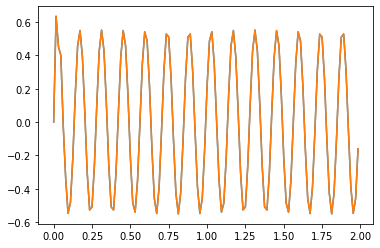

In [44]:
from scipy.signal import lfilter

N, f0, Fe = 128, 7, 64
t = np.arange(N)/Fe
x = np.sin(2*np.pi*f0*t)

y1 = lfilter([1], [1, 5/6, 1/6], x)
y2 = lfilter(h_n, [1], x) #Dans le domaine temporel donc il s'agit d'une convolution

plt.plot(t, y1)
plt.plot(t, y2)
plt.show()